<a href="https://colab.research.google.com/github/Tonytroller/TPs-ML/blob/main/TP4_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [84]:
import matplotlib
import numpy as np
import tensorflow 
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.layers import Dropout
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from keras.applications.efficientnet_v2 import EfficientNetV2B0, preprocess_input
from keras.models import Model
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

In [73]:
from google.colab import drive
import os

# Monter Google Drive dans Colab
drive.mount('/content/gdrive')

# Spécifier le chemin d'accès au dossier sur Google Drive
path = "/content/gdrive/MyDrive/Colab Notebooks/cats_and_dogs/train"
path2 = "/content/gdrive/MyDrive/Colab Notebooks/cats_and_dogs/test"

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [74]:
train_datagen = keras.preprocessing.image.ImageDataGenerator(
    horizontal_flip=True,  # retournement horizontal de l'image
    shear_range=0.1,
    vertical_flip=True,
    zoom_range=0.1,  # zoom léger
    preprocessing_function=preprocess_input,
    brightness_range=[0.8, 1.2]
)

In [75]:
test_datagen = keras.preprocessing.image.ImageDataGenerator(preprocessing_function=preprocess_input)

train_generator = train_datagen.flow_from_directory(
        path,
        target_size=(300, 300),
        batch_size=16,
        shuffle=True)

test_generator = test_datagen.flow_from_directory(
        path2,
        target_size=(300, 300),
        batch_size=16,
        shuffle=False)

Found 557 images belonging to 2 classes.
Found 140 images belonging to 2 classes.


In [76]:
from tensorflow.keras.applications import EfficientNetV2B0
# Load pre-trained CNN - Here inceptionV3 trained on image-net dataset
base_model = EfficientNetV2B0(weights='imagenet', include_top=False, input_shape=(300, 300, 3))

In [77]:
# Freeze all layers of the pre-trained model
for layer in base_model.layers:
    layer.trainable = False

In [78]:
x = base_model.output
x = Flatten()(x)
x = Dense(100, activation='relu')(x)
predictions = Dense(2, activation='softmax', kernel_initializer='random_uniform')(x)

In [79]:
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [80]:
A=model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=3
)

Epoch 1/3
35/35 [==============================] - 99s 3s/step - loss: 0.4209 - accuracy: 0.8600
Epoch 2/3
35/35 [==============================] - 89s 3s/step - loss: 0.1103 - accuracy: 0.9587
Epoch 3/3
35/35 [==============================] - 90s 3s/step - loss: 0.0637 - accuracy: 0.9803


In [81]:
loss, accuracy = model.evaluate(test_generator)

print('Loss on test set:', loss)
print('Accuracy on test set:', accuracy)

9/9 [==============================] - 67s 8s/step - loss: 0.3383 - accuracy: 0.9357
Loss on test set: 0.33830347657203674
Accuracy on test set: 0.9357143044471741


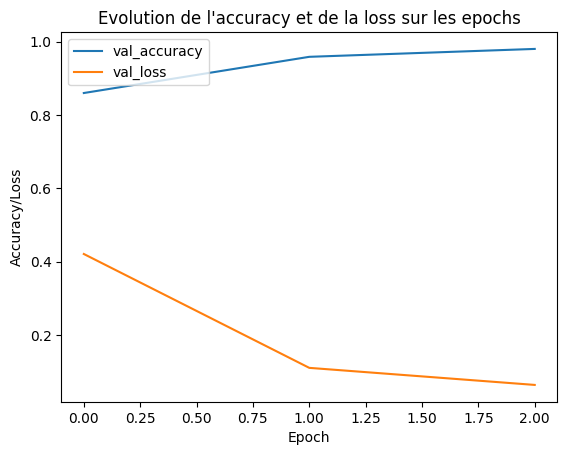

In [82]:
plt.plot(A.history['accuracy'])
plt.plot(A.history['loss'])
plt.title('Evolution de l\'accuracy et de la loss sur les epochs')
plt.ylabel('Accuracy/Loss')
plt.xlabel('Epoch')
plt.legend(['val_accuracy', 'val_loss', 'train_loss', 'val_loss'], loc='upper left')
plt.show()

9/9 [==============================] - 20s 2s/step


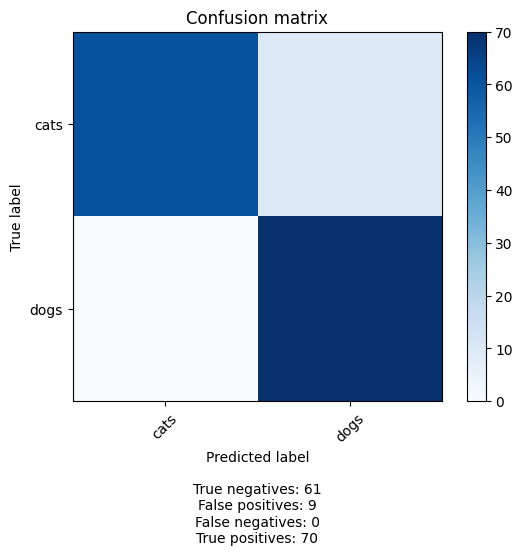

Accuracy: 0.9357142857142857
F1 score: 0.9354475126799529
Precision: 0.9430379746835443
Recall: 0.9357142857142857


In [85]:
from sklearn.metrics import confusion_matrix
import itertools

# Get true labels
y_true_labels = test_generator.classes
y_pred = model.predict(test_generator)
y_pred = np.round(y_pred)

# Convert predicted probabilities to class labels
y_pred_labels = np.argmax(y_pred, axis=1)

# Compute confusion matrix
cm = confusion_matrix(y_true_labels, y_pred_labels)

# Compute number of true/false positives/negatives
tn, fp, fn, tp = cm.ravel()

# Plot confusion matrix
plt.imshow(cm, cmap=plt.cm.Blues)
plt.title('Confusion matrix')
plt.colorbar()
tick_marks = np.arange(len(test_generator.class_indices))
plt.xticks(tick_marks, test_generator.class_indices.keys(), rotation=45)
plt.yticks(tick_marks, test_generator.class_indices.keys())
plt.xlabel('Predicted label\n\nTrue negatives: {}\nFalse positives: {}\nFalse negatives: {}\nTrue positives: {}'.format(tn, fp, fn, tp))
plt.ylabel('True label')
plt.show()


# Print metrics
print('Accuracy:', accuracy_score(y_true_labels, y_pred_labels))
print('F1 score:', f1_score(y_true_labels, y_pred_labels, average='weighted'))
print('Precision:', precision_score(y_true_labels, y_pred_labels, average='weighted'))
print('Recall:', recall_score(y_true_labels, y_pred_labels, average='weighted'))